# Serial data 

In [225]:
import numpy as np 
import matplotlib.pyplot as plt 
from pandas import read_csv 
import math 
import tensorflow as tf 
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error

In [226]:
# convert an array of values into a dataset matrix 
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [227]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [228]:
# load the dataset
dataframe = read_csv(
    "./airline-passengers.csv",
    usecols=[1],
    engine="python"
)
dataframe

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [229]:
dataset = dataframe.values
dataset = dataset.astype("float32")

dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [230]:
# normalize the dataset

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [231]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], \
    dataset[train_size:len(dataset), :]

train.shape, test.shape

((96, 1), (48, 1))

In [232]:
# reshape into X=t, and Y = t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)



In [233]:
trainX

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [234]:
trainY

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557,
       0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ,
       0.02702703, 0.02123553, 0.04247104, 0.07142857, 0.05984557,
       0.04054055, 0.08687258, 0.12741312, 0.12741312, 0.10424709,
       0.05598456, 0.01930502, 0.06949806, 0.07915059, 0.08880308,
       0.14285713, 0.11389962, 0.13127413, 0.14285713, 0.18339768,
       0.18339768, 0.15444016, 0.11196911, 0.08108109, 0.1196911 ,
       0.12934363, 0.14671814, 0.17181468, 0.14864865, 0.15250966,
       0.22007722, 0.24324325, 0.26640925, 0.2027027 , 0.16795367,
       0.13127413, 0.17374519, 0.17760617, 0.17760617, 0.25482625,
       0.25289574, 0.24131274, 0.26833975, 0.3088803 , 0.32432434,
       0.25675675, 0.20656371, 0.14671814, 0.18725869, 0.19305018,
       0.16216215, 0.25289574, 0.23745173, 0.25096524, 0.3088803 ,
       0.38223937, 0.36486486, 0.2992278 , 0.24131274, 0.1911197 ,
       0.24131274, 0.26640925, 0.24903473, 0.31467178, 0.31853

In [235]:
print(trainX.shape, trainX.shape[0], trainX.shape[1])
print(testX.shape, testX.shape[0], testX.shape[1])

# reshape input to [samples, time_steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

(94, 1) 94 1
(46, 1) 46 1


In [236]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0430
Epoch 2/100
94/94 - 1s - loss: 0.0229
Epoch 3/100
94/94 - 1s - loss: 0.0163
Epoch 4/100
94/94 - 1s - loss: 0.0149
Epoch 5/100
94/94 - 1s - loss: 0.0141
Epoch 6/100
94/94 - 1s - loss: 0.0132
Epoch 7/100
94/94 - 1s - loss: 0.0124
Epoch 8/100
94/94 - 1s - loss: 0.0115
Epoch 9/100
94/94 - 1s - loss: 0.0108
Epoch 10/100
94/94 - 1s - loss: 0.0098
Epoch 11/100
94/94 - 1s - loss: 0.0089
Epoch 12/100
94/94 - 1s - loss: 0.0079
Epoch 13/100
94/94 - 1s - loss: 0.0071
Epoch 14/100
94/94 - 1s - loss: 0.0063
Epoch 15/100
94/94 - 1s - loss: 0.0054
Epoch 16/100
94/94 - 1s - loss: 0.0048
Epoch 17/100
94/94 - 1s - loss: 0.0041
Epoch 18/100
94/94 - 1s - loss: 0.0035
Epoch 19/100
94/94 - 1s - loss: 0.0032
Epoch 20/100
94/94 - 1s - loss: 0.0028
Epoch 21/100
94/94 - 1s - loss: 0.0025
Epoch 22/100
94/94 - 1s - loss: 0.0023
Epoch 23/100
94/94 - 1s - loss: 0.0022
Epoch 24/100
94/94 - 1s - loss: 0.0021
Epoch 25/100
94/94 - 1s - loss: 0.0021
Epoch 26/100
94/94 - 1s - loss: 0.

In [237]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [238]:
# inevrt prediction
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [239]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train score: %.2f RMSE' % (trainScore))

testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test score: %.2f RMSE' % (testScore))

Train score: 22.69 RMSE
Test score: 48.82 RMSE


In [240]:
# shift train predictions for plotting 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [241]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan 
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = \
    testPredict 


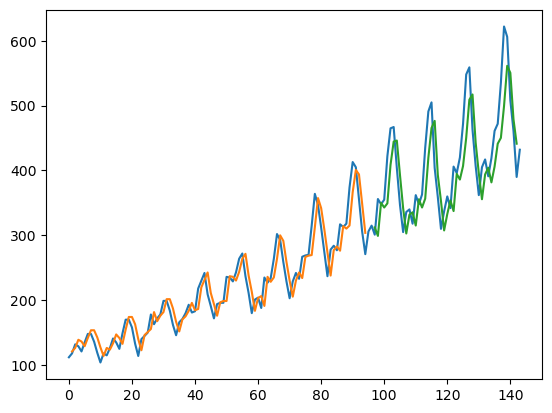

In [242]:
# plot baseline and predictions 
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM for Regression using Window Method


The create_dataset() function created in the previous section allows you to create this formulation of the time series problem by increasing the `look_back` argument from 1 to 3.

In [243]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from pandas import read_csv 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error

In [244]:
# convert an array of values into a dataset matrix 
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], [] 

    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [245]:
# fix random seed for reprodicibility
tf.random.set_seed(7)

In [246]:
# load the dataset 

dataframe = read_csv(
    "./airline-passengers.csv",
    usecols=[1],
    engine="python"
)
dataset = dataframe.values 
dataset = dataset.astype('float32')

In [247]:
# normalize the dataset 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [248]:
# split into train and test sets 
train_set = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size 

train, test = dataset[0:train_size, :], \
    dataset[train_size:len(dataset), :]

In [249]:
# reshape into X=t and Y=t+1
look_back = 3 
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [250]:
# reshape input to be [samples, time_steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [251]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


2022-12-29 23:00:39.519725: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


92/92 - 9s - loss: 0.0269 - 9s/epoch - 97ms/step
Epoch 2/100
92/92 - 1s - loss: 0.0100 - 602ms/epoch - 7ms/step
Epoch 3/100
92/92 - 1s - loss: 0.0075 - 709ms/epoch - 8ms/step
Epoch 4/100
92/92 - 1s - loss: 0.0067 - 849ms/epoch - 9ms/step
Epoch 5/100
92/92 - 1s - loss: 0.0059 - 726ms/epoch - 8ms/step
Epoch 6/100
92/92 - 1s - loss: 0.0053 - 729ms/epoch - 8ms/step
Epoch 7/100
92/92 - 1s - loss: 0.0048 - 757ms/epoch - 8ms/step
Epoch 8/100
92/92 - 1s - loss: 0.0045 - 766ms/epoch - 8ms/step
Epoch 9/100
92/92 - 1s - loss: 0.0040 - 756ms/epoch - 8ms/step
Epoch 10/100
92/92 - 1s - loss: 0.0038 - 705ms/epoch - 8ms/step
Epoch 11/100
92/92 - 1s - loss: 0.0037 - 835ms/epoch - 9ms/step
Epoch 12/100
92/92 - 1s - loss: 0.0036 - 806ms/epoch - 9ms/step
Epoch 13/100
92/92 - 1s - loss: 0.0035 - 728ms/epoch - 8ms/step
Epoch 14/100
92/92 - 1s - loss: 0.0035 - 674ms/epoch - 7ms/step
Epoch 15/100
92/92 - 1s - loss: 0.0035 - 672ms/epoch - 7ms/step
Epoch 16/100
92/92 - 1s - loss: 0.0033 - 675ms/epoch - 7ms/step

In [252]:
# make predictions 
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 9ms/step


In [253]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [254]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train score: %.2f RMSE' % (trainScore))

testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test score: %.2f RMSE' % (testScore))

Train score: 21.19 RMSE
Test score: 58.37 RMSE


In [255]:
# shift train predictions for plotting 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan 
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict

In [256]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan 
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = \
    testPredict 

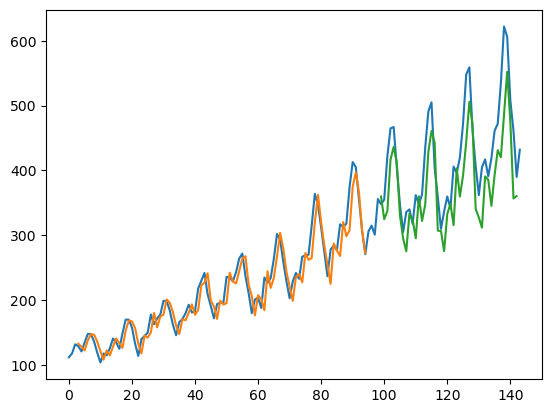

In [257]:
# plot baseline and predictions 
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()